# Get Satellite Images of PathumThani from Planet

## Step 1

Get shape file of Thailand administrative boundary shapefiles Part 1: administrative level 0 (country), 1 (province), and 2 (district) from http://thaigis.net/thailand-gis-resources/, https://data.humdata.org/dataset/thailand-administrative-boundaries

In [6]:
# !pip install pyshp
# !pip install pandas
# !pip install seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
     |████████████████████████████████| 25.2MB 2.6MB/s eta 0:00:01
ERROR: keras 2.2.4 requires h5py, which is not installed.
ERROR: deepcut 0.6.1.0 requires h5py, which is not installed.
ERROR: deepcut 0.6.1.0 requires scikit-learn, which is not installed.


See tutorial from https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f

In [7]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# shp_path = "./tha_adm_rtsd_itos_20190221_SHP_PART_1/tha_admbnda_adm1_rtsd_20190221.shp"
shp_path = "./tha_adm_rtsd_itos_20190221_SHP_PART_1/tha_admbnda_adm2_rtsd_20190221.shp"
sf = shp.Reader(shp_path)

In [9]:
len(sf.shapes())

928

In [10]:
sf.records()[1]

Record #1: [0.890470441643, 0.0142714914099, 'Amphawa', 'อัมพวา', 'TH7503', '', '', '', '', '', 'Samut Songkhram', 'สมุทรสงคราม', 'TH75', 'Thailand', 'ประเทศไทย', 'TH', datetime.date(2019, 2, 18), datetime.date(2019, 2, 21), b'']

In [11]:
sf.records()[1][3]

'อัมพวา'

In [12]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [13]:
df = read_shapefile(sf)
df.shape

(928, 20)

In [14]:
df.sample(5)

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_TH,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1TH,ADM2ALT2TH,ADM1_EN,ADM1_TH,ADM1_PCODE,ADM0_EN,ADM0_TH,ADM0_PCODE,date,validOn,validTo,coords
21,0.917470,0.021698,Ban Lat,บ้านลาด,TH7606,,,,,,Phetchaburi,เพชรบุรี,TH76,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(99.84449233600009, 13.130094624000037), (99...."
402,1.653809,0.059676,Mueang Kalasin,เมืองกาฬสินธุ์,TH4601,,,,,,Kalasin,กาฬสินธุ์,TH46,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(103.48131029700005, 16.661962544000062), (10..."
628,2.005500,0.083780,Phop Phra,พบพระ,TH6307,,,,,,Tak,ตาก,TH63,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(98.93626903200004, 16.640965815000072), (98...."
698,0.316093,0.003636,Sai Mai,สายไหม,TH1042,,,,,,Bangkok,กรุงเทพมหานคร,TH10,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(100.66319548500007, 13.930404936000059), (10..."
335,1.250142,0.034747,Lan Krabue,ลานกระบือ,TH6207,,,,,,Kamphaeng Phet,กำแพงเพชร,TH62,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(99.85665179600005, 16.72909679600002), (99.8..."


In [43]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [44]:
np.unique(df.ADM1_EN )

array(['Amnat Charoen', 'Ang Thong', 'Bangkok', 'Bueng Kan', 'Buri Ram',
       'Chachoengsao', 'Chai Nat', 'Chaiyaphum', 'Chanthaburi',
       'Chiang Mai', 'Chiang Rai', 'Chon Buri', 'Chumphon', 'Kalasin',
       'Kamphaeng Phet', 'Kanchanaburi', 'Khon Kaen', 'Krabi', 'Lampang',
       'Lamphun', 'Loei', 'Lop Buri', 'Mae Hong Son', 'Maha Sarakham',
       'Mukdahan', 'Nakhon Nayok', 'Nakhon Pathom', 'Nakhon Phanom',
       'Nakhon Ratchasima', 'Nakhon Sawan', 'Nakhon Si Thammarat', 'Nan',
       'Narathiwat', 'Nong Bua Lam Phu', 'Nong Khai', 'Nonthaburi',
       'Pathum Thani', 'Pattani', 'Phangnga', 'Phatthalung', 'Phayao',
       'Phetchabun', 'Phetchaburi', 'Phichit', 'Phitsanulok',
       'Phra Nakhon Si Ayutthaya', 'Phrae', 'Phuket', 'Prachin Buri',
       'Prachuap Khiri Khan', 'Ranong', 'Ratchaburi', 'Rayong', 'Roi Et',
       'Sa Kaeo', 'Sakon Nakhon', 'Samut Prakan', 'Samut Sakhon',
       'Samut Songkhram', 'Saraburi', 'Satun', 'Si Sa Ket', 'Sing Buri',
       'Songkhla', '

/home/yoyo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


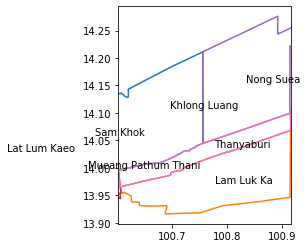

In [46]:
province = 'Pathum Thani'
com_ids = df[df.ADM1_EN == province].index.to_numpy()
plt.figure()
for com_id in com_ids:
    plot_shape(com_id, df.iloc[com_id].ADM2_EN)

In [47]:
df[df.ADM1_EN == province]

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_TH,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1TH,ADM2ALT2TH,ADM1_EN,ADM1_TH,ADM1_PCODE,ADM0_EN,ADM0_TH,ADM0_PCODE,date,validOn,validTo,coords
259,0.676763,0.025554,Khlong Luang,คลองหลวง,TH1302,,,,,,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(100.75528030400005, 14.130022374000077), (10..."
328,0.813825,0.025392,Lam Luk Ka,ลำลูกกา,TH1306,,,,,,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(100.91470128900005, 14.043970075000061), (10..."
344,0.612252,0.016100,Lat Lum Kaeo,ลาดหลุมแก้ว,TH1305,,,,,,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(100.39457177500003, 14.115112981000038), (10..."
426,0.618479,0.011908,Mueang Pathum Thani,เมืองปทุมธานี,TH1301,,,,,,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(100.59435150900003, 14.043607660000077), (10..."
548,0.782553,0.028447,Nong Suea,หนองเสือ,TH1304,,,,,,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(100.89157060600007, 14.245761235000032), (10..."
708,0.500013,0.010083,Sam Khok,สามโคก,TH1307,,,,,,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(100.53653661500005, 14.118090365000057), (10..."
840,0.730616,0.009501,Thanyaburi,ธัญบุรี,TH1303,,,,,,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,b'',"[(100.91483620300005, 14.068209147000061), (10..."


Another tutorial from https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac

In [2]:
!conda install -y geopandas

Solving environment: done

## Package Plan ##

  environment location: /home/yoyo/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.8.28  |                0         132 KB
    certifi-2019.9.11          |           py37_0         154 KB
    click-plugins-1.1.1        |             py_0          11 KB
    cligj-0.5.0                |           py37_0          12 KB
    curl-7.65.3                |       hbc83047_0         141 KB
    descartes-1.1.0            |             py_3           9 KB
    fiona-1.8.4                |   py37hc38cc03_0         1.0 MB
    freexl-1.0.5               |       h14c3975_0          44 KB
    gdal-2.3.3                 |   py37hbb2a789_0         1.3 MB
    geopandas-0.4.1            |             py_0         891 KB
    geos-3.7.1                 |       he6710b0_0         1.6 MB
    g

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# set the filepath and load
fp = "./tha_adm_rtsd_itos_20190221_SHP_PART_1/tha_admbnda_adm2_rtsd_20190221.shp"
#reading the file stored in variable fp
map_df = gpd.read_file(fp, encoding = 'utf-8')
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_TH,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1TH,ADM2ALT2TH,ADM1_EN,ADM1_TH,ADM1_PCODE,ADM0_EN,ADM0_TH,ADM0_PCODE,date,validOn,validTo,geometry
0,1.675375,0.048338,Akat Amnuai,อากาศอำนวย,TH4711,None,None,None,None,None,Sakon Nakhon,สกลนคร,TH47,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((103.9240776010001 17.81515221100005,..."
1,0.890470,0.014271,Amphawa,อัมพวา,TH7503,None,None,None,None,None,Samut Songkhram,สมุทรสงคราม,TH75,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((99.99694847000006 13.48059318300005,..."
2,1.886297,0.054916,Ao Luek,อ่าวลึก,TH8105,None,None,None,None,None,Krabi,กระบี่,TH81,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"(POLYGON ((98.69051073600008 8.20364083000004,..."
3,2.022411,0.061416,Aranyaprathet,อรัญประเทศ,TH2706,None,None,None,None,None,Sa Kaeo,สระแก้ว,TH27,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((102.4801598120001 13.87030116900007,..."
4,1.153553,0.035097,At Samat,อาจสามารถ,TH4514,None,None,None,None,None,Roi Et,ร้อยเอ็ด,TH45,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((103.8786849360001 15.94940593600006,..."


In [4]:
map_df.crs['init'].split(':')[1]

{'init': 'epsg:4326'}

In [5]:
gjson = map_df.to_crs(epsg='4326').to_json()

In [6]:
import folium
mapa = folium.Map([-15.783333, -47.866667],
                  zoom_start=4,
                  tiles='cartodbpositron')

points = folium.features.GeoJson(gjson)

mapa.add_children(points)
mapa

ModuleNotFoundError: No module named 'folium'

In [25]:
pathum_df = map_df[map_df['ADM1_EN'] == 'Pathum Thani']
pathum_df.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_TH,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1TH,ADM2ALT2TH,ADM1_EN,ADM1_TH,ADM1_PCODE,ADM0_EN,ADM0_TH,ADM0_PCODE,date,validOn,validTo,geometry
259,0.676763,0.025554,Khlong Luang,คลองหลวง,TH1302,None,None,None,None,None,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((100.7552803040001 14.13002237400008,..."
328,0.813825,0.025392,Lam Luk Ka,ลำลูกกา,TH1306,None,None,None,None,None,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((100.914701289 14.04397007500006, 100..."
344,0.612252,0.016100,Lat Lum Kaeo,ลาดหลุมแก้ว,TH1305,None,None,None,None,None,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((100.394571775 14.11511298100004, 100..."
426,0.618479,0.011908,Mueang Pathum Thani,เมืองปทุมธานี,TH1301,None,None,None,None,None,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((100.594351509 14.04360766000008, 100..."
548,0.782553,0.028447,Nong Suea,หนองเสือ,TH1304,None,None,None,None,None,Pathum Thani,ปทุมธานี,TH13,Thailand,ประเทศไทย,TH,2019-02-18,2019-02-21,None,"POLYGON ((100.8915706060001 14.24576123500003,..."


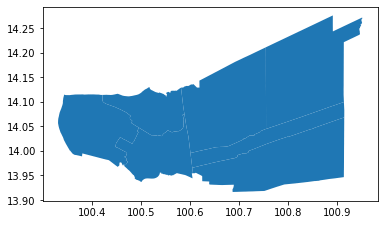

In [26]:
#plotting the map of the shape file preview of the maps without data in it
pathum_df.plot()

In [30]:
# !conda install -y basemap
# !conda install -y basemap-data-hires
!conda install -y pillow

Solving environment: done

## Package Plan ##

  environment location: /home/yoyo/anaconda3

  added / updated specs:
    - pillow


The following NEW packages will be INSTALLED:

  olefile            pkgs/main/linux-64::olefile-0.46-py37_0
  pillow             pkgs/main/linux-64::pillow-5.4.1-py37h34e0f95_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import pandas as pd

In [52]:
bounds = pathum_df.geometry.bounds
maxval = bounds.max().to_numpy()[2:]
minval = bounds.min().to_numpy()[:2]
print(bounds)
print(maxval)
print(minval)

           minx       miny        maxx       maxy
259  100.582140  13.995610  100.755503  14.211074
328  100.605139  13.916254  100.914836  14.068209
344  100.331625  13.967343  100.496604  14.115113
426  100.448628  13.936719  100.606526  14.074246
548  100.755051  14.044766  100.951852  14.275951
708  100.422039  14.030044  100.589280  14.130117
840  100.601430  13.965550  100.914942  14.099629
[100.95185176  14.27595109]
[100.33162488  13.91625443]


In [31]:
lat=csv['LAT'].values
lon=csv['LONG'].values
population = city['POPULATION'].values
dist=city['DIST_NAME'].values

NameError: name 'csv' is not defined

/home/yoyo/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


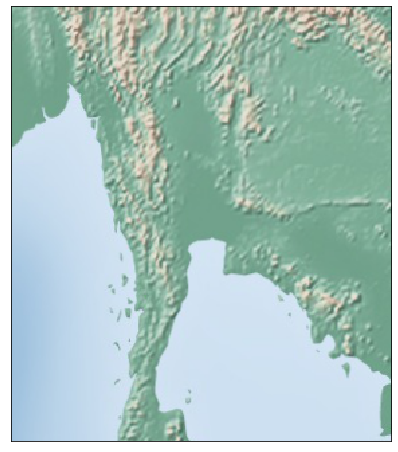

In [62]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=minval[1], lon_0=minval[0],
            width=1.05E6, height=1.2E6)
m.shadedrelief()


In [58]:
maxval

array([100.95185176,  14.27595109])